# Regiment

### Introduction:

Special thanks to: http://chrisalbon.com/ for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Create the DataFrame with the following values:

In [2]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

### Step 3. Assign it to a variable called regiment.
#### Don't forget to name each column

In [3]:
df = pd.DataFrame(data=raw_data)
df.head()

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70


### Step 4. What is the mean preTestScore from the regiment Nighthawks?  

In [6]:
dfg = df.groupby('regiment')

In [18]:
dfg.preTestScore.mean()

regiment
Dragoons      15.50
Nighthawks    15.25
Scouts         2.50
Name: preTestScore, dtype: float64

In [44]:
dfg.preTestScore.mean()[['Nighthawks']]

regiment
Nighthawks    15.25
Name: preTestScore, dtype: float64

In [46]:
dfg.preTestScore.mean()[1]

15.25

In [47]:
dfg.preTestScore.mean()[[1]]

regiment
Nighthawks    15.25
Name: preTestScore, dtype: float64

In [50]:
mask = df['regiment'] == 'Nighthawks'

In [52]:
df[mask].preTestScore.mean()

15.25

In [22]:
df.preTestScore

0      4
1     24
2     31
3      2
4      3
5      4
6     24
7     31
8      2
9      3
10     2
11     3
Name: preTestScore, dtype: int64

In [23]:
type(dfg.preTestScore.mean())

pandas.core.series.Series

In [24]:
s = dfg.preTestScore.mean()

In [29]:
s

regiment
Dragoons      15.50
Nighthawks    15.25
Scouts         2.50
Name: preTestScore, dtype: float64

In [26]:
s.name

'preTestScore'

In [28]:
s.index

Index(['Dragoons', 'Nighthawks', 'Scouts'], dtype='object', name='regiment')

In [30]:
s.values

array([15.5 , 15.25,  2.5 ])

In [31]:
s.dtypes

dtype('float64')

In [32]:
import seaborn as sns

In [33]:
s

regiment
Dragoons      15.50
Nighthawks    15.25
Scouts         2.50
Name: preTestScore, dtype: float64

In [34]:
sns.barplot(x='regiment', data=s)

ValueError: Could not interpret input 'regiment'

In [37]:
d = s.reset_index()

In [39]:
d

,regiment,preTestScore
0,Dragoons,15.50
1,Nighthawks,15.25
2,Scouts,2.50


<AxesSubplot:xlabel='regiment', ylabel='preTestScore'>

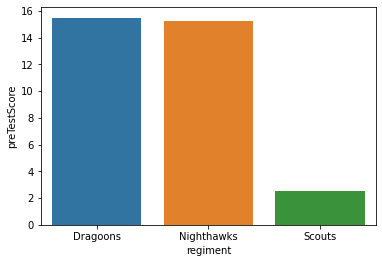

In [41]:
sns.barplot(x='regiment', y='preTestScore', data=d)

In [42]:
s

regiment
Dragoons      15.50
Nighthawks    15.25
Scouts         2.50
Name: preTestScore, dtype: float64

<AxesSubplot:xlabel='regiment'>

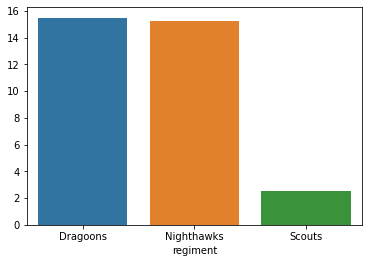

In [43]:
sns.barplot(x=s.index, y=s.values)

In [19]:
df.groupby('regiment').mean()

,preTestScore,postTestScore
regiment,,
Dragoons,15.50,61.5
Nighthawks,15.25,59.5
Scouts,2.50,66.0


In [15]:
dfg.get_group('Dragoons')

,regiment,company,name,preTestScore,postTestScore
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57


In [7]:
type(dfg)

pandas.core.groupby.generic.DataFrameGroupBy

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
for i in df.groupby('regiment'):
    print(i)

('Dragoons',    regiment company    name  preTestScore  postTestScore
4  Dragoons     1st   Cooze             3             70
5  Dragoons     1st   Jacon             4             25
6  Dragoons     2nd  Ryaner            24             94
7  Dragoons     2nd    Sone            31             57)
('Nighthawks',      regiment company      name  preTestScore  postTestScore
0  Nighthawks     1st    Miller             4             25
1  Nighthawks     1st  Jacobson            24             94
2  Nighthawks     2nd       Ali            31             57
3  Nighthawks     2nd    Milner             2             62)
('Scouts',    regiment company   name  preTestScore  postTestScore
8    Scouts     1st  Sloan             2             62
9    Scouts     1st  Piger             3             70
10   Scouts     2nd  Riani             2             62
11   Scouts     2nd    Ali             3             70)


In [10]:
for i in df.groupby('regiment'):
    print(i[0])

Dragoons
Nighthawks
Scouts


In [11]:
for i in df.groupby('regiment'):
    print(i[1])

   regiment company    name  preTestScore  postTestScore
4  Dragoons     1st   Cooze             3             70
5  Dragoons     1st   Jacon             4             25
6  Dragoons     2nd  Ryaner            24             94
7  Dragoons     2nd    Sone            31             57
     regiment company      name  preTestScore  postTestScore
0  Nighthawks     1st    Miller             4             25
1  Nighthawks     1st  Jacobson            24             94
2  Nighthawks     2nd       Ali            31             57
3  Nighthawks     2nd    Milner             2             62
   regiment company   name  preTestScore  postTestScore
8    Scouts     1st  Sloan             2             62
9    Scouts     1st  Piger             3             70
10   Scouts     2nd  Riani             2             62
11   Scouts     2nd    Ali             3             70


In [14]:
for label, data in df.groupby('regiment'):
    print((label, data))

('Dragoons',    regiment company    name  preTestScore  postTestScore
4  Dragoons     1st   Cooze             3             70
5  Dragoons     1st   Jacon             4             25
6  Dragoons     2nd  Ryaner            24             94
7  Dragoons     2nd    Sone            31             57)
('Nighthawks',      regiment company      name  preTestScore  postTestScore
0  Nighthawks     1st    Miller             4             25
1  Nighthawks     1st  Jacobson            24             94
2  Nighthawks     2nd       Ali            31             57
3  Nighthawks     2nd    Milner             2             62)
('Scouts',    regiment company   name  preTestScore  postTestScore
8    Scouts     1st  Sloan             2             62
9    Scouts     1st  Piger             3             70
10   Scouts     2nd  Riani             2             62
11   Scouts     2nd    Ali             3             70)


In [12]:
for label, data in df.groupby('regiment'):
    print(data)

   regiment company    name  preTestScore  postTestScore
4  Dragoons     1st   Cooze             3             70
5  Dragoons     1st   Jacon             4             25
6  Dragoons     2nd  Ryaner            24             94
7  Dragoons     2nd    Sone            31             57
     regiment company      name  preTestScore  postTestScore
0  Nighthawks     1st    Miller             4             25
1  Nighthawks     1st  Jacobson            24             94
2  Nighthawks     2nd       Ali            31             57
3  Nighthawks     2nd    Milner             2             62
   regiment company   name  preTestScore  postTestScore
8    Scouts     1st  Sloan             2             62
9    Scouts     1st  Piger             3             70
10   Scouts     2nd  Riani             2             62
11   Scouts     2nd    Ali             3             70


In [10]:
df.groupby(['Nighthawks']).preTestScore.mean()

KeyError: 'Nighthawks'

### Step 5. Present general statistics by company

### Step 6. What is the mean of each company's preTestScore?

### Step 7. Present the mean preTestScores grouped by regiment and company

### Step 8. Present the mean preTestScores grouped by regiment and company without heirarchical indexing

### Step 9. Group the entire dataframe by regiment and company

### Step 10. What is the number of observations in each regiment and company

### Step 11. Iterate over a group and print the name and the whole data from the regiment